# **IBM Stock Price Prediction with Machine Learning and Deep Learning Models**

## By: Shivani Sheth


## Preprocess IBM Stock Price Data from json file

In [ ]:
# Loading data from the json file and converting it to a dataframe.
import json
import pandas as pd

json_file_path = "IBM Daily Price.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

value1 = contents["Time Series (Daily)"] 
df = pd.DataFrame(value1).T
df = df.apply(pd.to_numeric)
df = df.reset_index()
df.columns=['Date','Open', 'High', 'Low', 'Close', 'Volume']
df = df.sort_values(by="Date")
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,1999-11-01,98.50,98.81,96.37,96.75,9551800
1,1999-11-02,96.75,96.81,93.69,94.81,11105400
2,1999-11-03,95.87,95.94,93.50,94.37,10369100
3,1999-11-04,94.44,94.44,90.00,91.56,16697600
4,1999-11-05,92.75,92.94,90.19,90.25,13737600


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

<Figure size 432x288 with 0 Axes>

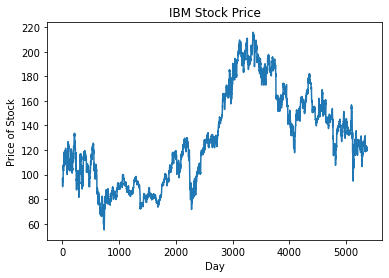

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Close'] , label = 'Close')
plt.ylabel('Price of Stock')
plt.xlabel('Day')
plt.title('IBM Stock Price')
plt.figure()

In [ ]:
# Preprocess data and split into train and test sets
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math

data = df.filter(['Close'])
raw_data = data.values

# Taking 80% data as training data and 20% data as testing data
training_data_len = math.ceil(len(raw_data)*.8)
print("Length of all closing values: ",len(raw_data))
print("Length of training data: ",training_data_len)
print("Length of testing data: ", len(raw_data) - training_data_len)

#  Scaling the data via MinMaxScaler.
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(raw_data)
training_data = scaled_data[0 : training_data_len , :]

# TRAIN DATA

# Converting training data into a data structure with 60 timesteps and 1 output.
x_train = []
y_train = []

for i in range(60 , len(training_data)):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0 ])

# Converting to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
y_train = np.reshape(y_train, (y_train.shape[0] ,  1))

# Check train data shapes
print("\nx_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)

# TEST DATA
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = raw_data[training_data_len: , : ]

# Converting test data into a data structure with 60 timesteps and 1 output.
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i , 0 ])

# Converting to numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

# Check test data shapes
print("\nx_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

Length of all closing values:  5369
Length of training data:  4296
Length of testing data:  1073

x_train shape:  (4236, 60, 1)
y_train shape:  (4236, 1)

x_test shape:  (1073, 60, 1)
y_test shape:  (1073, 1)


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

            Date      Open      High       Low     Close    Volume
0     1999-11-01   98.5000   98.8100   96.3700   96.7500   9551800
1     1999-11-02   96.7500   96.8100   93.6900   94.8100  11105400
2     1999-11-03   95.8700   95.9400   93.5000   94.3700  10369100
3     1999-11-04   94.4400   94.4400   90.0000   91.5600  16697600
4     1999-11-05   92.7500   92.9400   90.1900   90.2500  13737600
5     1999-11-08   90.5000   93.9400   90.5000   93.9400   8522300
6     1999-11-09   95.0600   95.5000   92.1200   93.6200   9551200
7     1999-11-10   94.6200   97.0600   94.1200   97.0000   8680300
8     1999-11-11   97.5000   97.5000   94.8700   95.0000   7147500
9     1999-11-12   96.0000   96.2500   93.0000   95.8700   9668400
10    1999-11-15   96.0000   96.3700   93.8700   94.0600   6259400
11    1999-11-16   94.6200   95.0000   93.0000   94.6200   8537400
12    1999-11-17   94.8700   94.8700   92.6200   93.7500   8355100
13    1999-11-18   94.0000   98.2500   93.5600   98.0000  1872

## IBM Stock Price Prediction with LSTM

In [ ]:
# Build LSTM Model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Defining the LSTM Recurrent Model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))

#Compiling and fitting the model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = lstm_model.fit(x_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
133/133 [==============================] - 8s 12ms/step - loss: 0.0332
Epoch 2/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0036
Epoch 3/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0033
Epoch 4/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0030
Epoch 5/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0030
Epoch 6/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0026
Epoch 7/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0028
Epoch 8/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0022
Epoch 9/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0021
Epoch 10/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0020
Epoch 11/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0018
Epoch 12/15
133/133 [==============================] - 2s 12ms/step - loss: 0.0020
Epoch 13/15
1

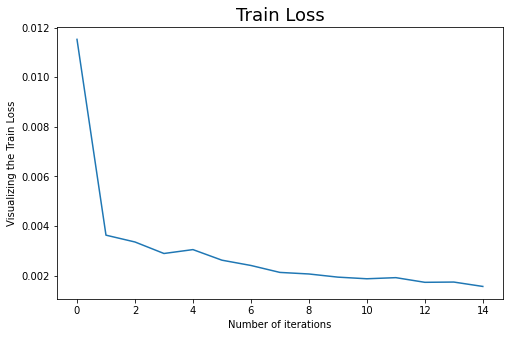

In [ ]:
#Visualizing the change in the training loss
plt.figure(figsize=(8,5))
train_loss = history.history['loss']
plt.plot(train_loss) 
plt.title("Train Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Visualizing the Train Loss") 
plt.show() 

In [ ]:
# Predicting the closing stock prices for the test data.
predictions =  lstm_model.predict(x_test)
prediction = scaler.inverse_transform(predictions)

print("Length of predicted data: ",len(prediction))

# Calculating error between the model predictions and actual values of test data
error = np.sqrt(np.mean(prediction-y_test)**2)
print("Mean square error: ", error)

Length of predicted data:  1073
Mean square error:  1.0666629324110446


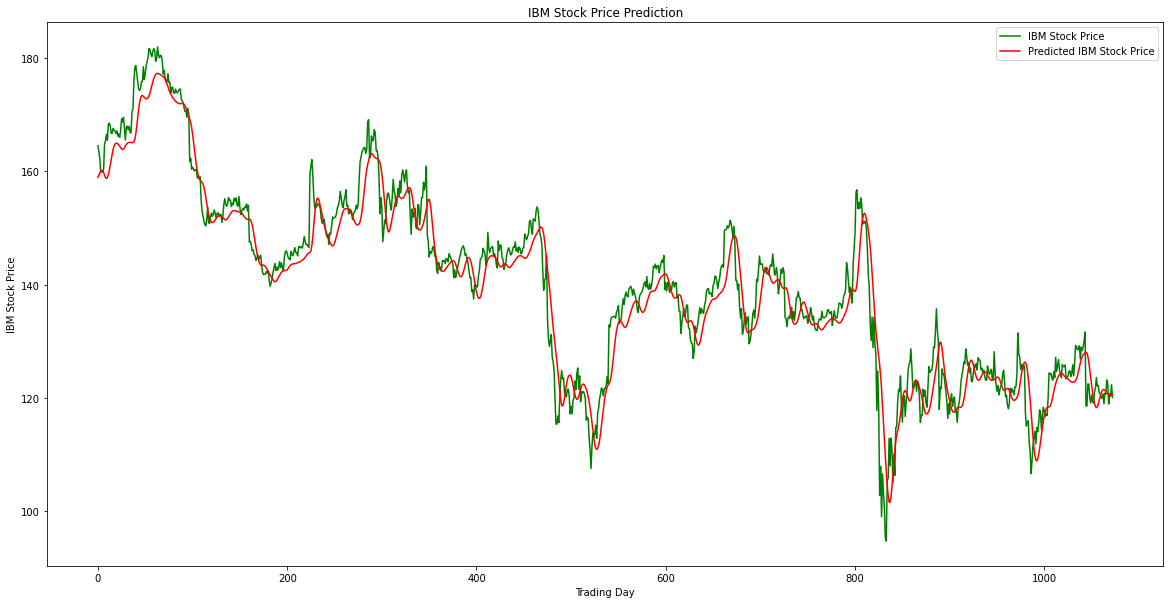

In [ ]:
#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'green', label = 'IBM Stock Price')
plt.plot(prediction, color = 'red', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


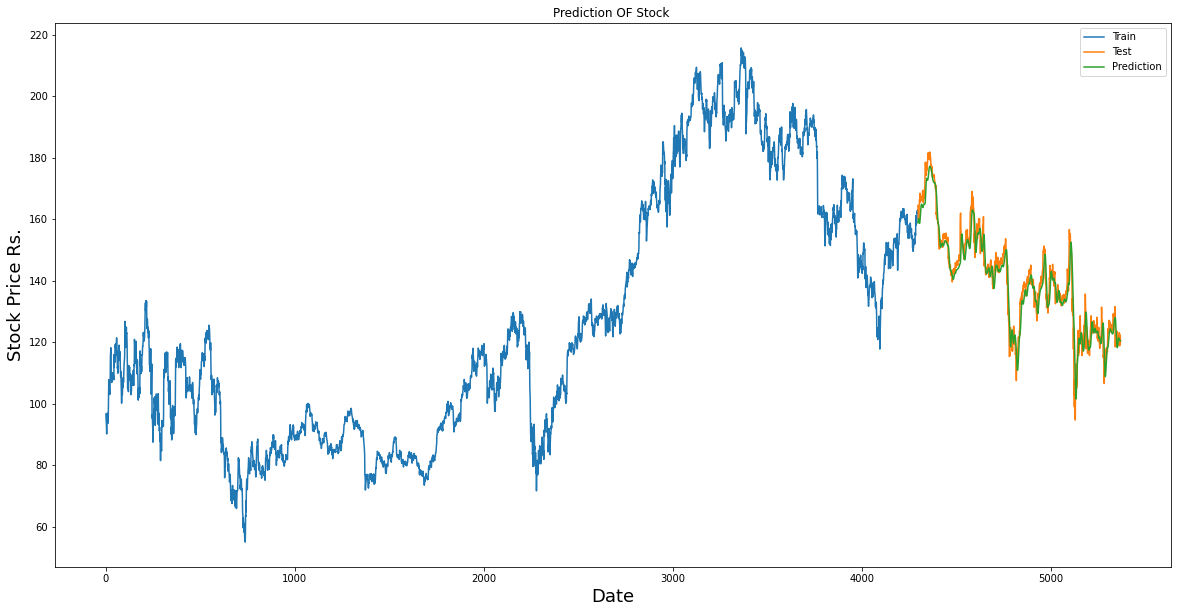

In [ ]:
#Visualizing the prediction data with the overall data
plt.figure(figsize=(20,10))
train = data[: training_data_len]
valid = data[training_data_len : ]
valid['Prediction'] = prediction
plt.title('Prediction OF Stock ')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Stock Price Rs.' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Prediction']])
plt.legend(['Train' , 'Test' , 'Prediction'] , loc = 'upper right')

## IBM Stock Price Prediction with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Split and reshape data for linear regression. Note that we only take the closing values of the IBM stock prices for prediction.
lr_train, lr_test = df.loc[:training_data_len, ['Close']], df.loc[training_data_len:, ['Close']]

lr_x_train = np.array(lr_train.index).reshape(-1, 1)
lr_y_train = lr_train['Close']

lr_x_test = np.array(lr_test.index).reshape(-1, 1)
lr_y_test = lr_test['Close']

# Create model
lin_model = LinearRegression()
lin_model.fit(lr_x_train, lr_y_train)

# The coefficient and intercepts
print('Slope: ', np.asscalar(np.squeeze(lin_model.coef_)))
print('Intercept: ', lin_model.intercept_)

Slope:  0.024668896376664695
Intercept:  73.1607909413138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


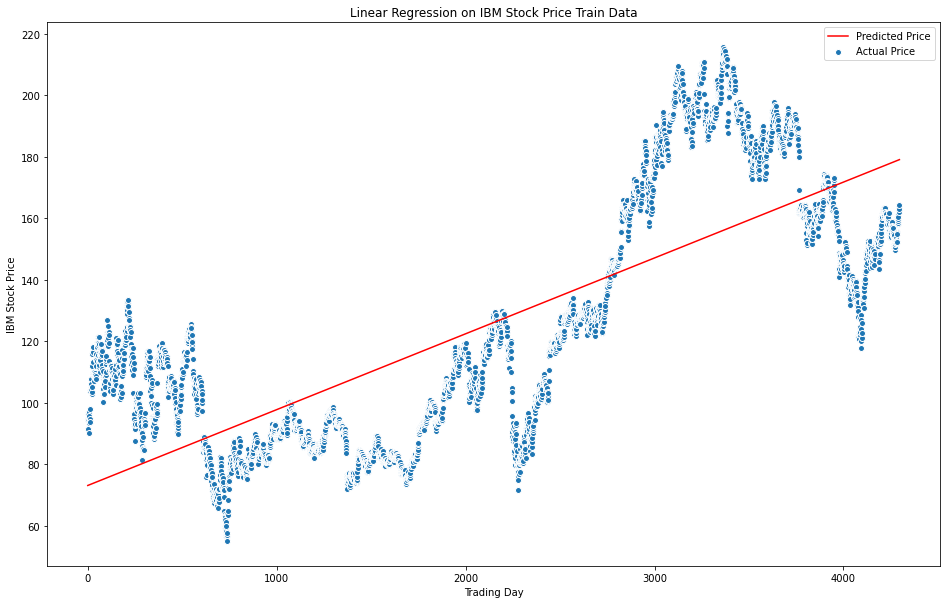

In [ ]:
# Visualizing Linear Regression on the data
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression on IBM Stock Price Train Data')
plt.scatter(lr_x_train, lr_y_train, edgecolor='w', label='Actual Price')
plt.plot(lr_x_train, lin_model.predict(lr_x_train), color='r', label='Predicted Price')
plt.xlabel('Trading Day')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
lr_y_pred = lin_model.predict(lr_x_test)
lr_error = np.sqrt(np.mean(lr_y_pred - lr_y_test)**2)
print("Mean square error for Linear Regression: ", lr_error)

Mean square error for Linear Regression:  51.80902032096251


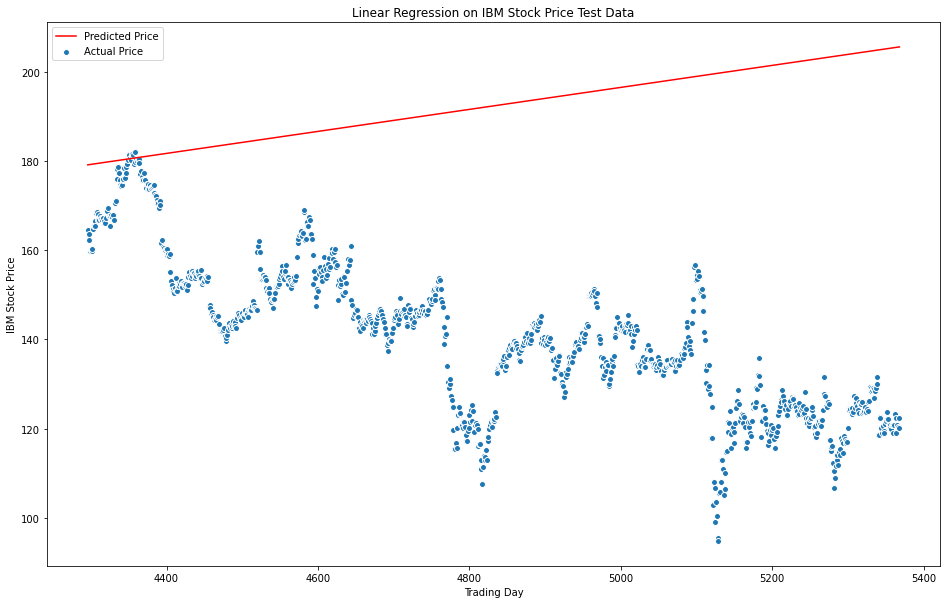

In [ ]:
#Visualizing the prediction
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression on IBM Stock Price Test Data')
plt.scatter(lr_x_test, lr_y_test, edgecolor='w', label='Actual Price')
plt.plot(lr_x_test, lr_y_pred, color='r', label='Predicted Price')
plt.xlabel('Trading Day')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

## IBM Stock Price Prediction with ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

# here cutoff is the cutoff for p-value
def test_stationarity(timeseries, window = 12, cutoff = 0.05):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Close'].values, maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    if dftest[1] <= cutoff:
        print('p-value = {}. The series is likely stationary.'.format(dftest[1]))
    else:
        print('p-value = {}. The series is likely non-stationary.'.format(dftest[1]))
        print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


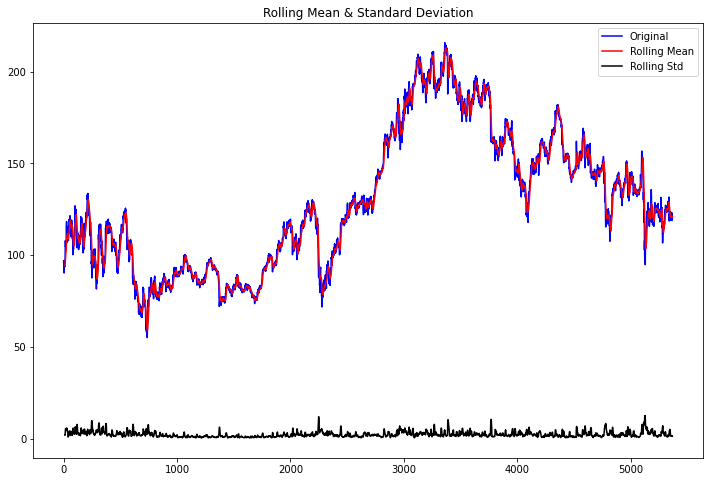

Results of Dickey-Fuller Test:
p-value = 0.3451279249820689. The series is likely non-stationary.
Test Statistic                   -1.872455
p-value                           0.345128
#Lags Used                       19.000000
Number of Observations Used    5349.000000
Critical Value (1%)              -3.431573
Critical Value (5%)              -2.862080
Critical Value (10%)             -2.567058
dtype: float64


In [ ]:
test_stationarity(data)

In [ ]:
# Get the difference of each Adj Close point
spy_close_diff_1 = data.diff()
# Drop the first row as it will have a null value in this column
spy_close_diff_1.dropna(inplace=True)

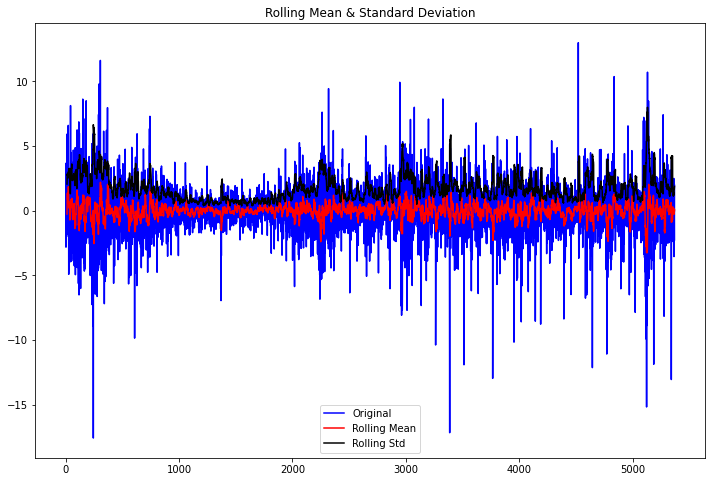

Results of Dickey-Fuller Test:
p-value = 5.5895753898431114e-30. The series is likely stationary.


In [ ]:
test_stationarity(spy_close_diff_1)

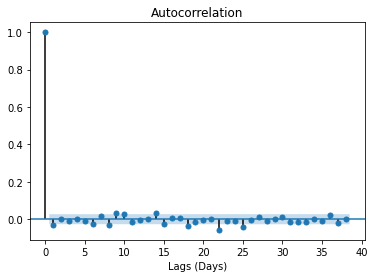

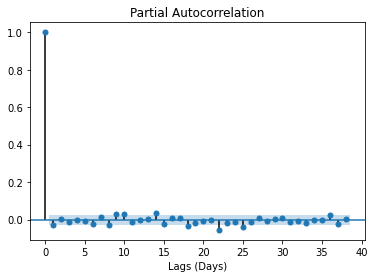

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(spy_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()
# Break these into two separate cells
plot_pacf(spy_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()

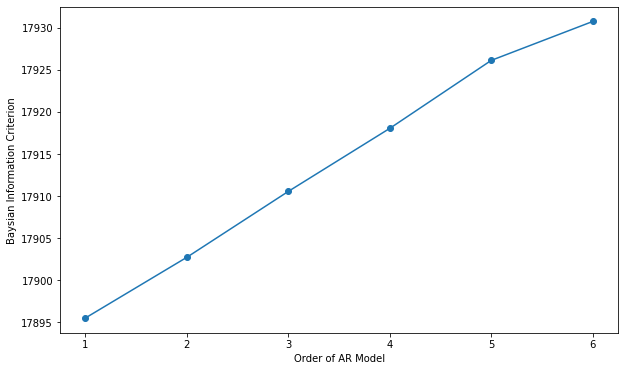

In [ ]:
# Fit data to the model and check the BIC scores to identify optimal 'p'.
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(lr_train.iloc[:,0].values, order=(p,0))
    res = mod.fit()  
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.figure(figsize=(10,6))
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()

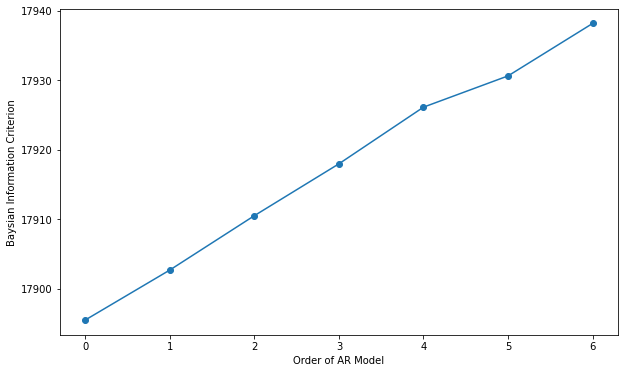

In [ ]:
# Fit data to the model and check the BIC scores to identify optimal 'q'.
BIC = np.zeros(7)
for q in range(7):
    mod = ARMA(lr_train.iloc[:,0].values, order=(1,q))
    res = mod.fit()   
    BIC[q] = res.bic

# Plot the BIC as a function of p
plt.figure(figsize=(10,6))
plt.plot(range(0,7), BIC[0:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()

In [ ]:
# Verify optimal values of p,q.
import warnings

p=0
q=0
d=0
pdq=[]
bic = []

for p in range(1, 6):
    for q in range(4):
      try:
        with warnings.catch_warnings():
          warnings.filterwarnings("ignore")
          arima_mod = ARMA(lr_train['Close'].values,(p,q)).fit()
          y = arima_mod.bic
          x1= p,q
          print(x1, y)
          pdq.append(x1)
          bic.append(y)

      except:
        pass

bic.sort()
print(bic[0])

(1, 0) 17895.52857916311
(1, 1) 17902.71107903688
(1, 2) 17910.52410237101
(1, 3) 17917.976836736594
(2, 0) 17902.737917917366
(2, 1) 17907.884624271475
(2, 2) 17915.979629570793
(2, 3) 17924.894498709993
(3, 0) 17910.561955227557
(3, 1) 17915.987661779807
(3, 2) 17924.262766444364
(3, 3) 17932.1433714401
(4, 0) 17918.04738613728
(4, 1) 17924.94165816723
(4, 2) 17927.13151358113
(4, 3) 17931.611418356904
(5, 0) 17926.11846058822
(5, 1) 17933.264050595582
(5, 2) 17939.75593467304
(5, 3) 17941.337505398416
17895.52857916311


The lowest BIC score corresponds to (p,q) = (1,0) and hence we verify that (1,0) are the optimal parameters for the model.

In [ ]:
# Fit model. Parameters are in the sequence of (p,d,q) where we take (p,q) = (1,0) and d = 1 since the data is stationary when we differentiate it once.
from statsmodels.tsa.arima_model import ARIMA
ibm_arima = ARIMA(lr_train, order=(1,1,0))
ibm_arima_fit = ibm_arima.fit(disp=0)
print(ibm_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4296
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -8930.711
Method:                       css-mle   S.D. of innovations              1.935
Date:                Fri, 23 Apr 2021   AIC                          17867.422
Time:                        17:15:03   BIC                          17886.518
Sample:                             1   HQIC                         17874.166
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0158      0.029      0.544      0.587      -0.041       0.073
ar.L1.D.Close    -0.0170      0.015     -1.117      0.264      -0.047       0.013
                                    Root

In [ ]:
import keras
arima_x_train = lr_train['Close'].values
arima_x_test = lr_test['Close'].values
# Create list of x train valuess
history = [x for x in arima_x_train]
# establish list for predictions
model_predictions = []
# Count number of test data points
N_test_observations = len(arima_x_test)
# loop through every data point
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = arima_x_test[time_point]
    history.append(true_test_value)
MAE_error = keras.metrics.mean_absolute_error(arima_x_test, model_predictions).numpy()
print('Testing Mean Squared Error is {}'.format(MAE_error))
%store model_predictions

Testing Mean Squared Error is [25.47096751 25.49021544 24.69835261 ... 21.06293962 21.32556814
 19.91117672]
Stored 'model_predictions' (list)


In [ ]:
arima_mae = np.sqrt(np.mean(arima_x_test - model_predictions)**2)
arima_mae

0.05114755315841678

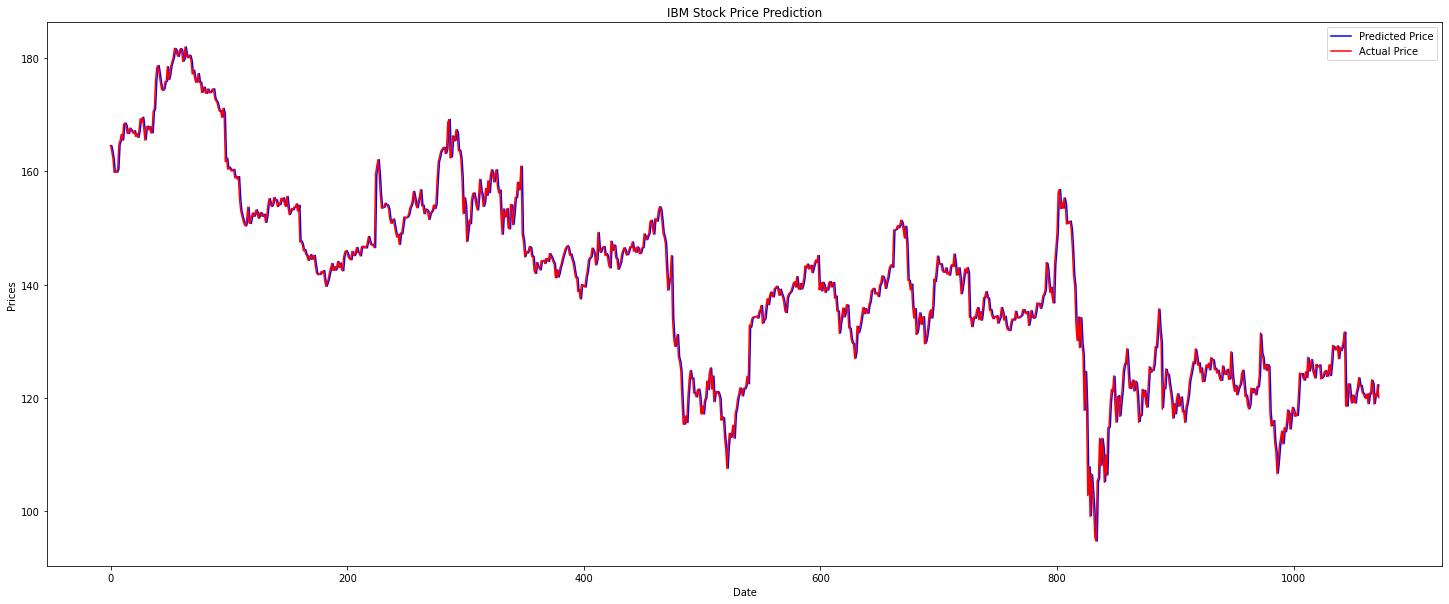

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(model_predictions, color='blue',label='Predicted Price')
plt.plot(arima_x_test, color='red', label='Actual Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

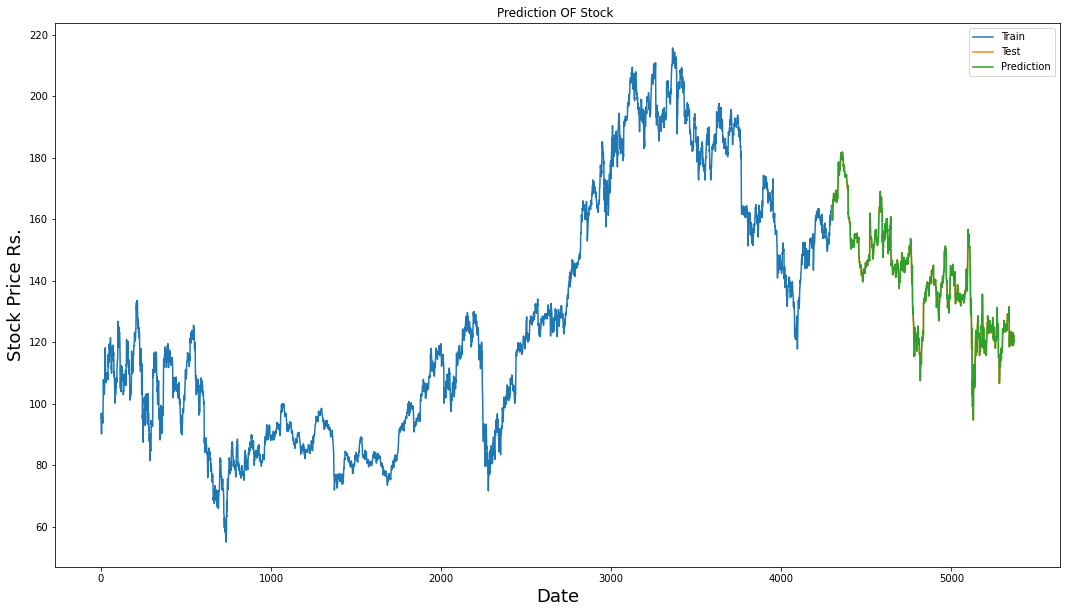

In [ ]:
#Visualizing the prediction data with the overall data
arima_train = lr_train
arima_valid = lr_test
arima_valid['Prediction'] = model_predictions
plt.figure(figsize=(18,10))
plt.title('Prediction OF Stock ')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Stock Price Rs.' , fontsize = 18)
plt.plot(arima_train['Close'])
plt.plot(arima_valid[['Close' , 'Prediction']])
plt.legend(['Train' , 'Test' , 'Prediction'] , loc = 'upper right')